# Proyecto 1 - Etapa 1

Integrantes:
*   Daniel Pedroza - 202123283
*   Pablo Martinez - 202122937
*   Miguel Gomez - 202122937


# Importar librerias y datos

In [ ]:
!pip install num2words

In [ ]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 19.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Librerías estándar
import re
import numpy as np
import pandas as pd


# Configuración de Pandas
pd.options.display.max_colwidth = 200

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Librerías de procesamiento de lenguaje natural (NLP)
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from num2words import num2words
import string
import unicodedata
import spacy
from collections import Counter
# Descargar los recursos necesarios de NLTK y SpaCy
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load('es_core_news_sm')

# Crear el objeto stemmer en español
stemmer = SnowballStemmer('spanish')

# Librerías de machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# Librerías de almacenamiento de modelos
from joblib import dump, load

# Librerías estadísticas
import scipy.stats as stats

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Cargar datos
df = pd.read_excel('/content/ODScat_345.xlsx', sheet_name='Datos')

# Entendimiento de los datos

#### Dimensiones del dataset

In [ ]:
df.shape

(4049, 2)

> Dos columnas y 4049 registros

#### Caracteristicas de nuestro dataset

In [ ]:
df.columns

Index(['Textos_espanol', 'sdg'], dtype='object')

> Identificamos la columna `Textos_espanol` como los textos que se tendran que procesar

> Identificamos la columna `sdg` como la categoria a la que pertenece cada texto

#### Categorias diferentes

In [ ]:
df['sdg'].unique()

array([3, 4, 5])

> Las posibles categorias por cada mensaje son de `3` `4` o `5`

#### Tipos de datos de cada columna

In [ ]:
df.dtypes

,0
Textos_espanol,object
sdg,int64


> `Textos_espanol` es de tipo `object` y debe ser cambiada a string


> `sdg` es de tipo `int64` y del tipo correcto



#### Verificamos la cuenta de nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB


> No hay datos nulos

#### Top palabras mas utilizadas

In [ ]:
def preprocess_text(text):
    stop_words = set(stopwords.words('spanish'))
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

df['tokens_words_count_analisis'] = df['Textos_espanol'].apply(preprocess_text)

> Aplicar preprocesamiento para que no se tengan en cuenta las stopwords (Pronombres, Articulos, Preposiciones...)


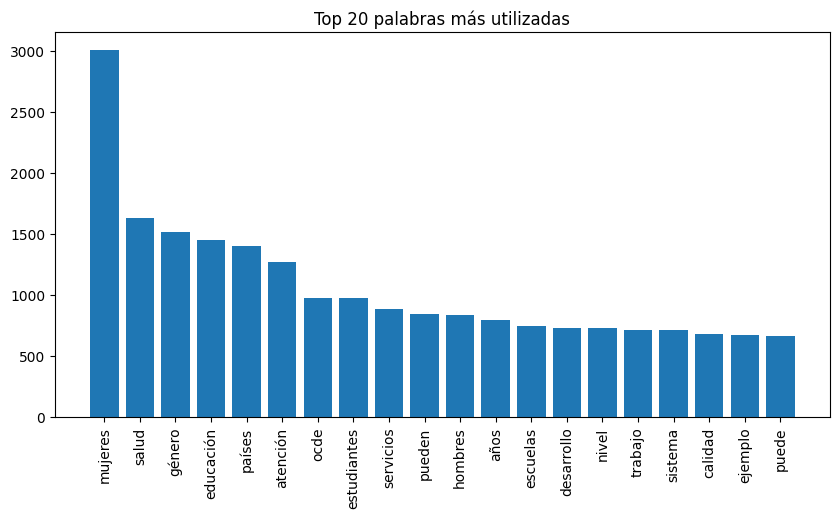

In [ ]:
all_words = [word for tokens in df['tokens_words_count_analisis'] for word in tokens]
word_freq = Counter(all_words)

top_20_words = word_freq.most_common(20)

plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_20_words))
plt.title('Top 20 palabras más utilizadas')
plt.xticks(rotation=90)
plt.show()

> Top 20 palabras mas utilizadas en todos los mensajes

#### Top palabras mas utilizadas por categoria

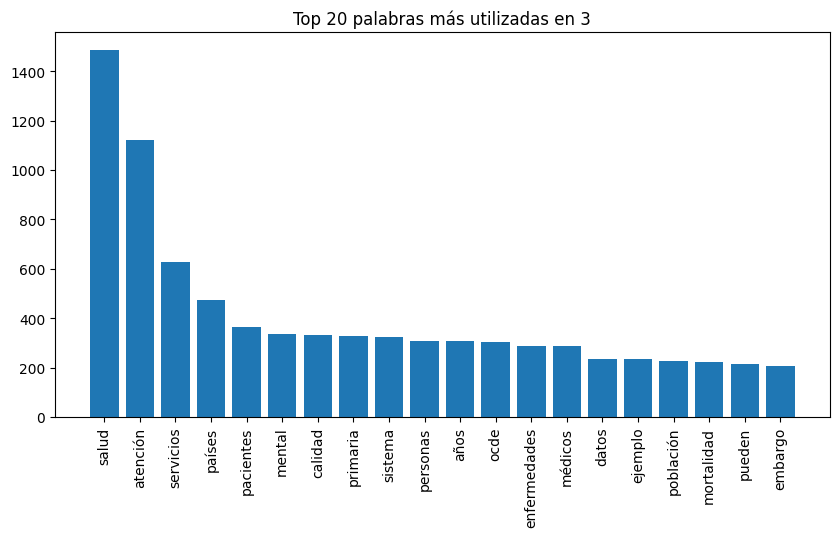

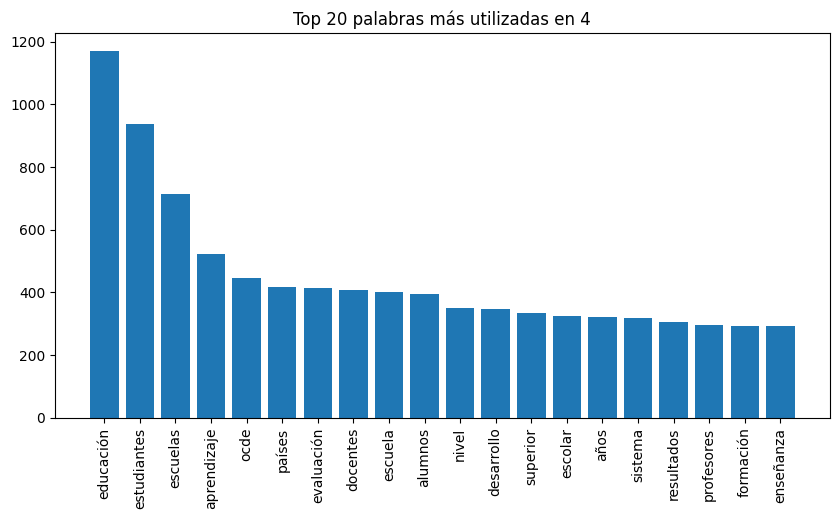

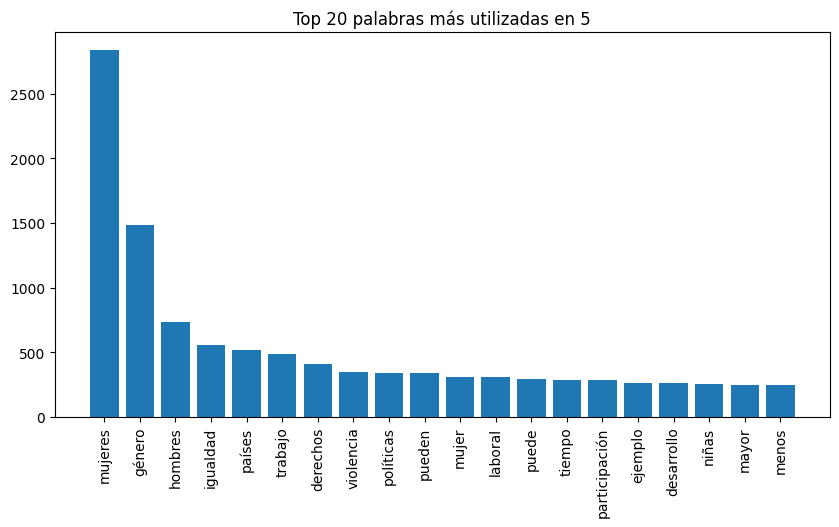

In [ ]:
def get_top_words_by_category(df, category):
    category_words = [word for tokens in df[df['sdg'] == category]['tokens_words_count_analisis'] for word in tokens]
    category_word_freq = Counter(category_words)
    return category_word_freq.most_common(20)

categories = df['sdg'].unique()

for category in categories:
    top_20_words_category = get_top_words_by_category(df, category)
    plt.figure(figsize=(10, 5))
    plt.bar(*zip(*top_20_words_category))
    plt.title(f'Top 20 palabras más utilizadas en {category}')
    plt.xticks(rotation=90)
    plt.show()

> Top 20 palabras mas utilizadas por categoria

#### Conteo de mensaje por categorias

In [ ]:
conteo_sdg = df['sdg'].value_counts()

In [ ]:
conteo_sdg

,count
sdg,
5,1451
4,1354
3,1244


> Cada categoria tiene entre 1200 y 1500 mensajes

#### Histograma de conteo de mensajes en cada categoria

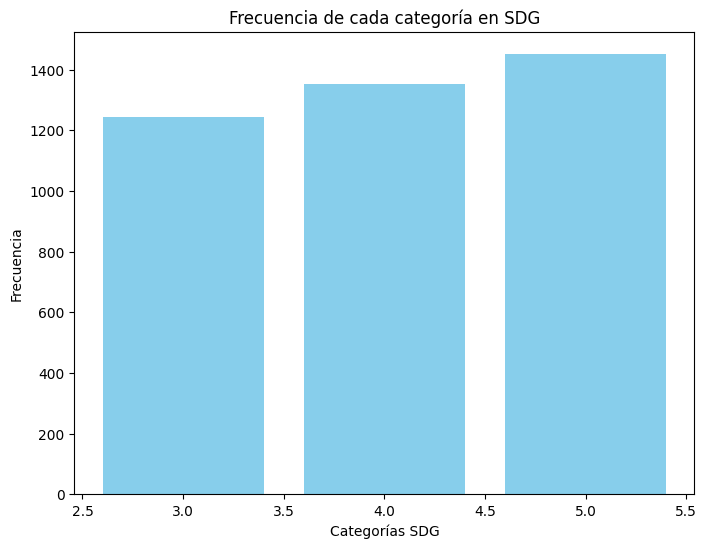

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(conteo_sdg.index, conteo_sdg.values, color='skyblue')
plt.xlabel('Categorías SDG')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cada categoría en SDG')
plt.show()

#### Conteo de caracteres por cada mensaje

In [ ]:
textos = df.copy()
textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]

> `Conteo`: conteo de caracteres en cada mensaje

> `Max`: longitud máxima de las palabras en cada mensaje

> `Min`: longitud mínima de las palabras en cada mensaje



In [ ]:
textos.sample(5)

,Textos_espanol,sdg,tokens_words_count_analisis,Conteo,Max,Min
2327,"Los países donde la representación de las mujeres en el parlamento es mayor, como China, Bangladesh y Pakistán, por ejemplo, generalmente se basan en cuotas legales de género. La experiencia de Ti...",5,"[países, representación, mujeres, parlamento, mayor, china, bangladesh, pakistán, ejemplo, generalmente, basan, cuotas, legales, género, experiencia, país, asiático, mayor, proporción, mujeres, pa...",944,14,1
1830,Se esperaba que los estudiantes adquirieran un corpus básico de conocimientos para luego especializarse en un campo de su elección y seguir una carrera profesional en ese ámbito. Para lograr este ...,4,"[esperaba, estudiantes, adquirieran, corpus, básico, conocimientos, luego, especializarse, campo, elección, seguir, carrera, profesional, ámbito, lograr, objetivo, consideraba, suficiente, profeso...",742,17,0
2330,"Las niñas siguen siendo menos propensas que los niños a elegir campos de estudio científicos y tecnológicos y, cuando lo hacen, es menos probable que acepten trabajos bien remunerados en esos camp...",5,"[niñas, siguen, siendo, menos, propensas, niños, elegir, campos, estudio, científicos, tecnológicos, hacen, menos, probable, acepten, trabajos, bien, remunerados, campos, basan, estereotipos, ocup...",892,19,1
3859,"En los 160 países incluidos en el Índice de Género e Instituciones Sociales (SIGI) de la OCDE, una de cada tres mujeres está de acuerdo en que la violencia doméstica está justificada (OCDE Develop...",5,"[países, incluidos, índice, género, instituciones, sociales, sigi, ocde, cada, tres, mujeres, acuerdo, violencia, doméstica, justificada, ocde, development, centre, efectos, económicos, significat...",420,15,1
2610,"Sin embargo, se necesitan más avances para mejorar la comparabilidad de los datos desglosados ​​por género entre países. Sin embargo, los proveedores de crédito también pueden discriminar a las mu...",5,"[embargo, necesitan, avances, mejorar, comparabilidad, datos, desglosados, género, países, embargo, proveedores, crédito, pueden, discriminar, mujeres, empresarias, bancos, políticas, públicas, ap...",700,15,1


> Ejemplo de 5 registros

#### Histograma de conteos de palabras por categoria

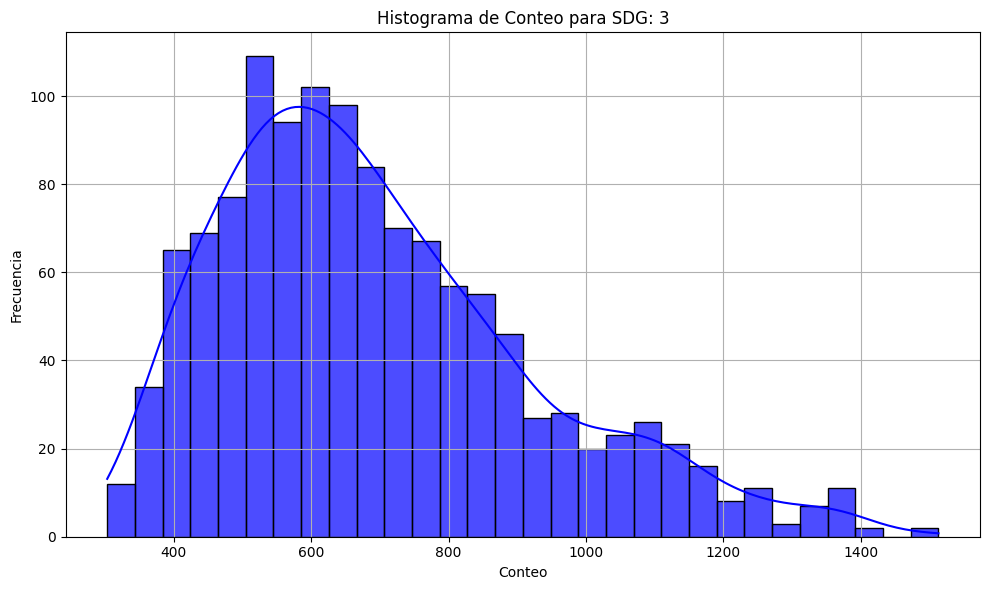

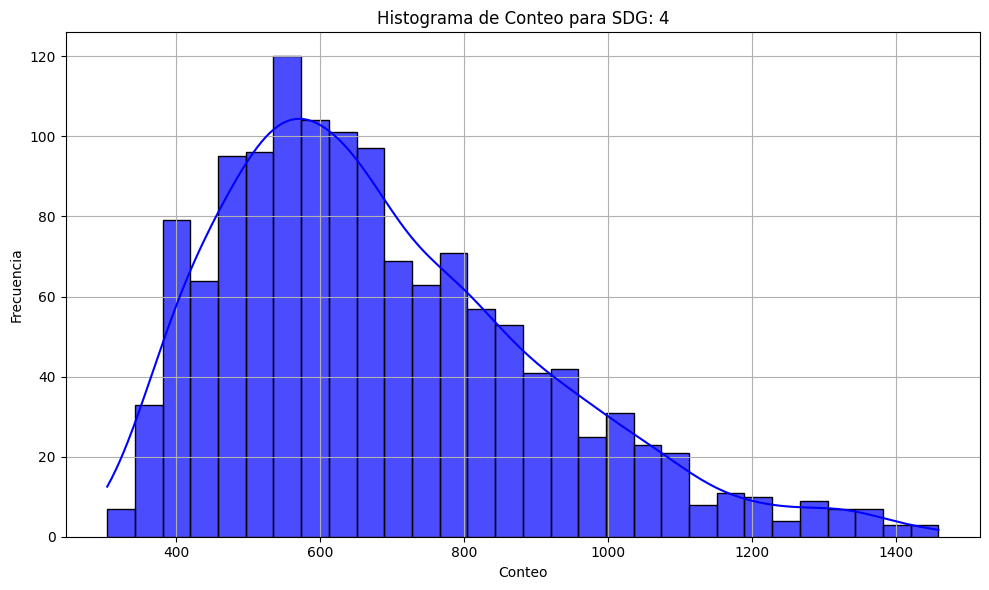

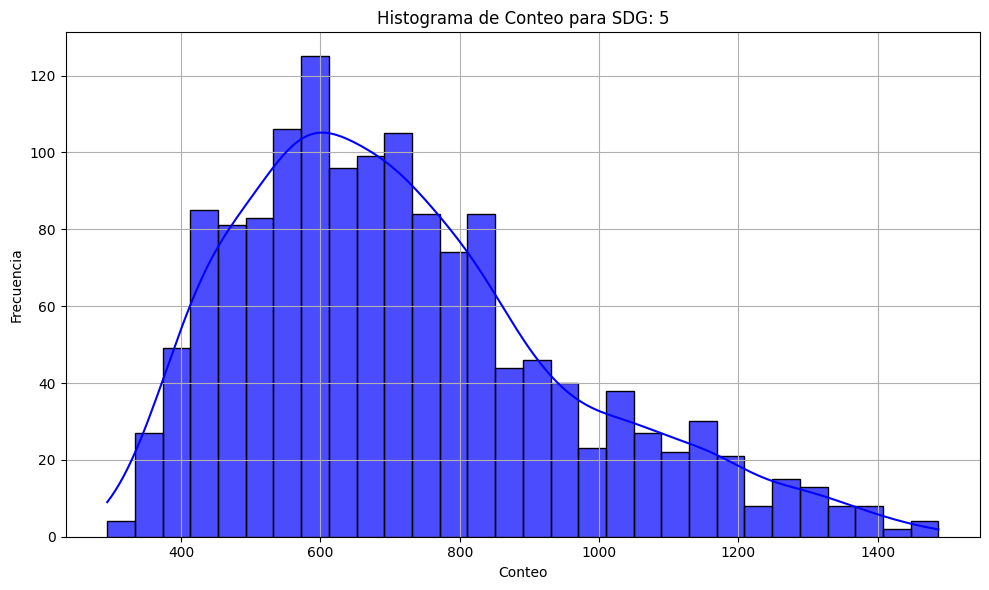

In [ ]:
for sdg_value in textos['sdg'].unique():
    subset = textos[textos['sdg'] == sdg_value]

    # Histograma para Conteo
    plt.figure(figsize=(10, 6))
    sns.histplot(subset['Conteo'], bins=30, alpha=0.7, color='blue',kde=True)
    plt.title(f'Histograma de Conteo para SDG: {sdg_value}')
    plt.xlabel('Conteo')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

> Las distribuciones de cuenta de caracteres por mensaje parece verse igual a traves de cada categoria

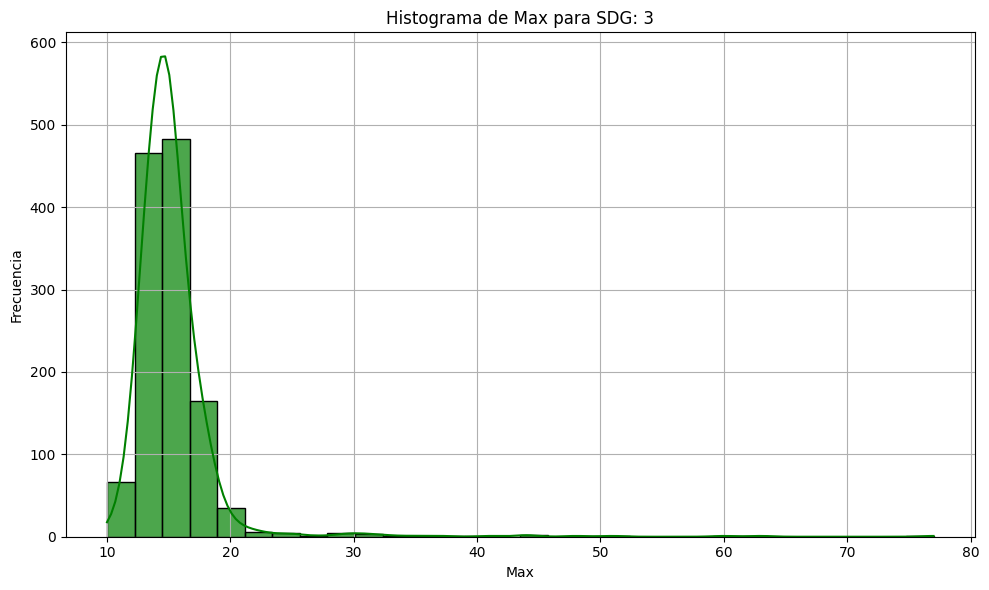

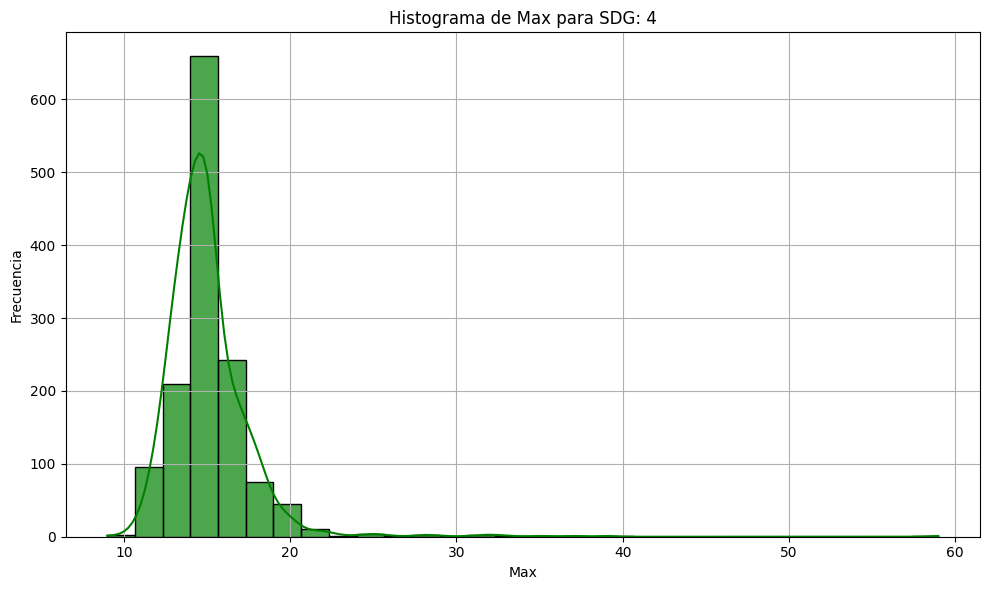

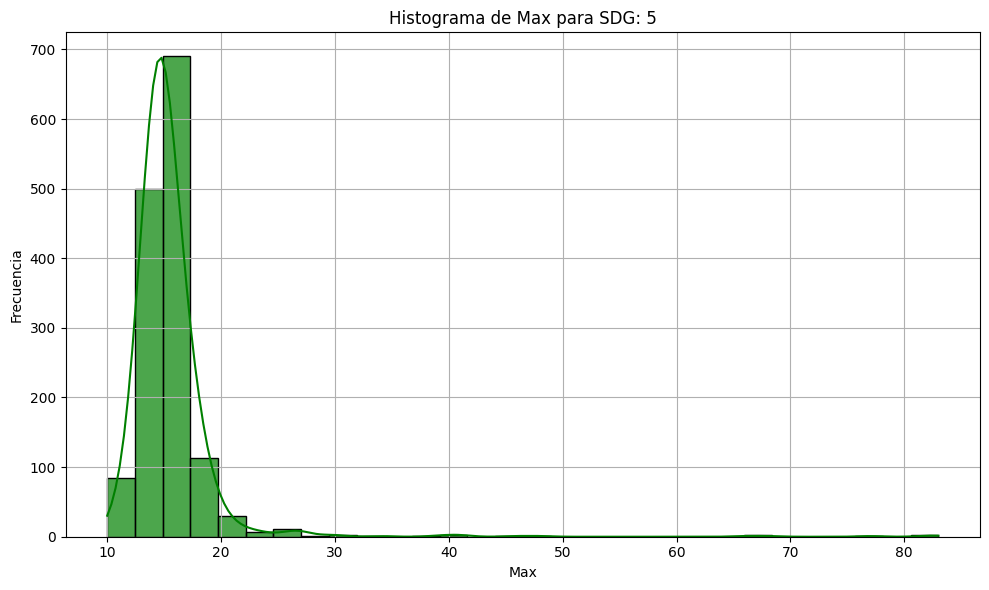

In [ ]:
for sdg_value in textos['sdg'].unique():
    subset = textos[textos['sdg'] == sdg_value]

    # Histograma para Max
    plt.figure(figsize=(10, 6))
    sns.histplot(subset['Max'], bins=30, alpha=0.7, kde=True,color='green')
    plt.title(f'Histograma de Max para SDG: {sdg_value}')
    plt.xlabel('Max')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

> Las distribuciones de longitud máxima de las palabras en cada mensaje parece verse igual a traves de cada categoria

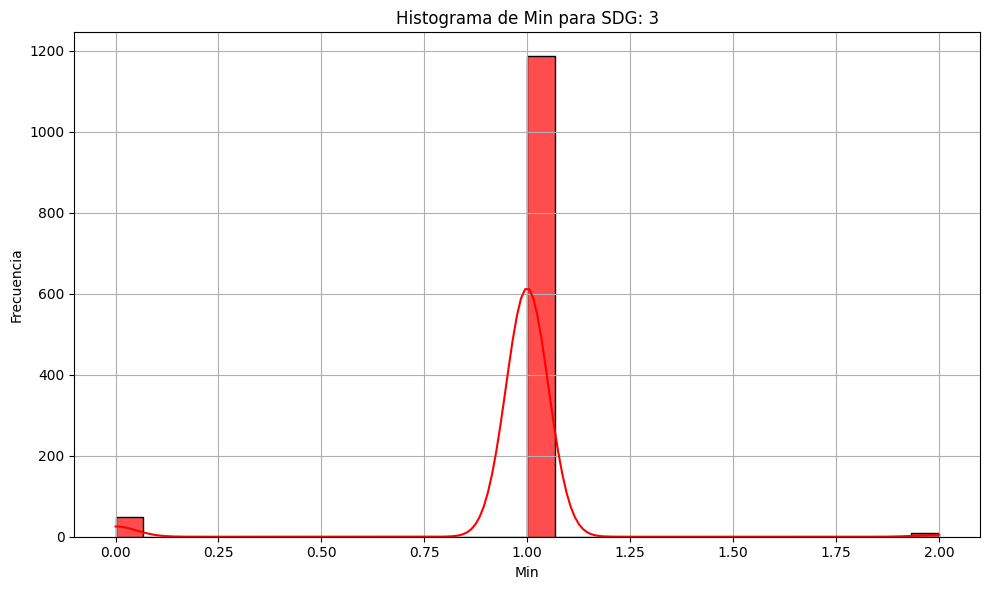

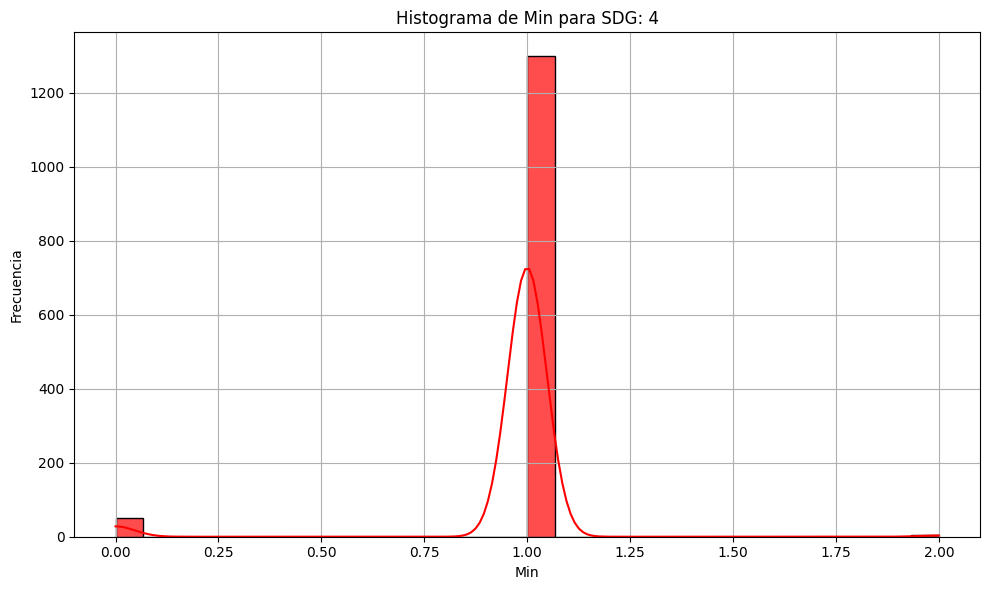

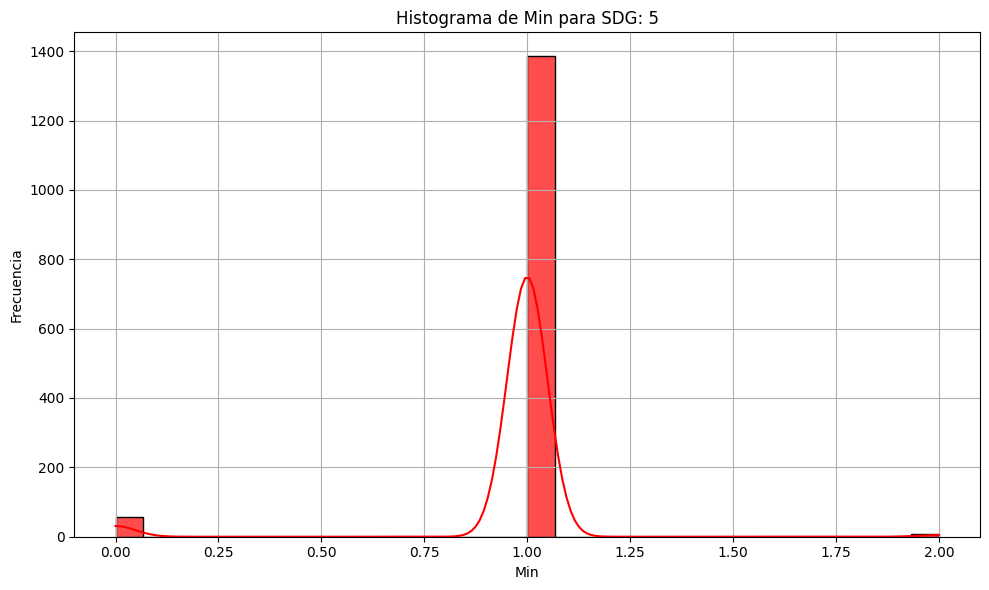

In [ ]:
for sdg_value in textos['sdg'].unique():
    subset = textos[textos['sdg'] == sdg_value]

    # Histograma para Min
    plt.figure(figsize=(10, 6))
    sns.histplot(subset['Min'], bins=30, alpha=0.7, kde=True,color='red')
    plt.title(f'Histograma de Min para SDG: {sdg_value}')
    plt.xlabel('Min')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

> Las distribuciones de longitud minima de las palabras en cada mensaje parece verse igual a traves de cada categoria

#  Preparación de los datos

### Limpieza de datos

#### Corregir porcentaje

In [ ]:
def replace_percentage(texto):
    texto = texto.replace('%', ' porciento')
    return texto

> Se reemplaza el caracter `%` por la palabra `porciento` para poder tenerlo en cuenta

#### Corregir codificacion

In [ ]:
reemplazos = {
    'ñ':'ni',
    'Ã¡': 'a',
    'Ã©': 'e',
    'Ã­': 'i',
    'Ã³': 'o',
    'Ãº': 'u',
    'Ãñ': 'ni',
    'Ã': 'a',
    'Ã¼': 'u',
    'Ã¢': 'a',
    'Ãª': 'e',
    'Ã ': 'a',  # Para palabras como 'asÃ'
    'Ã¡n': 'an',  # Para casos como 'podrÃan'
    'Ã­a': 'ia',  # Para palabras como 'psiquiatrÃa'
    'Ã±o': 'no',  # Para palabras como 'tamaÃ±o'
    'Ã³n': 'on',  # Para palabras como 'corresponderÃan'
    'Ã­n': 'in',  # Para palabras como 'mÃnimo'
    'Ã¡s': 'as',  # Para palabras como 'paÃs'
    'Ã©s': 'es',  # Para palabras como 'paÃses'
    'Ã³lico': 'olico',  # Para 'holÃstico'
    'Ãºltico': 'ultico',  # Para 'jurÃdico'
    'Ã¡tica': 'atica',  # Para 'polÃtica'
    'Ã': 'a',  # Genérico para cualquier letra mal codificada con 'Ã'
    'Ã±a': 'na',  # Para palabras como 'acompaÃ±ado'
    'Ã¼nica': 'unica',  # Para palabras con diéresis mal codificadas
    'Ã©tica': 'etica',  # Para palabras como 'polÃticas'
    'Ã¡nima': 'anima',  # Para 'mÃnima'
    'Ãºrica': 'urica',  # Para 'empÃrica'
    'Ãºna': 'una',  # Para 'mayorÃa'
    'Ã³r': 'or',  # Para 'estadÃstico'
    'Ã±icos': 'nicos',  # Para 'jurÃnicos'
    'Ãºltico': 'ultico',  # Para 'jurÃltico'
    'Ã¡frica': 'africa',  # Para 'Ãfrica'
    'Ã³nicos': 'onicos',  # Para 'polÃnicos'
    'Ã":': 'a',  # Para casos como 'kuwaitÃes'
    'Ã©tica': 'etica',  # Para palabras con 'polÃtica',
    'Ã±': 'ni'

}
def corregir_codificacion(texto, reemplazos):
    for clave, valor in reemplazos.items():
        texto = texto.replace(clave, valor)
    return texto

> Correcion de caracteres que estaban mal codificados

#### Remover ascii

In [ ]:
def remove_non_ascii(words):
    return words.encode('ascii', 'ignore').decode('ascii')

> Se remueven caracteres que no sean de tipo ascii

#### A minuscula

In [ ]:
def to_lowercase(words):
    return words.lower()

> Pasar todos los mensajes a minuscula

#### Remover puntuacion

In [ ]:
def remove_punctuation(words):
    return words.translate(str.maketrans('', '', string.punctuation))

> Remover todos los signos de puntuacion de los mensajes

#### Reemplazar numeros

In [ ]:
def replace_numbers(text):
    def convert(match):
        number = match.group(0).replace(',', '.')
        if '.' in number:
            return num2words(float(number), lang='es').replace(' coma ', 'punto').replace(' ', '')
        else:
            return num2words(int(number), lang='es')

    return re.sub(r'\d+([,.]\d+)?', convert, text)

> Reemplazar todos los numeros por sus palabras

#### Remover stopwords

In [ ]:
def remove_stopwords(words):
    stop_words = set(stopwords.words('spanish'))
    return ' '.join([word for word in words.split() if word not in stop_words])

> Se remueven palabras comunes como artículos
preposiciones
conjunciones y
pronombres

#### Remover acentos

In [ ]:
def remove_accents(words):
    nfkd_form = unicodedata.normalize('NFKD', words)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

> Se reemplazan las tildes por su vocal sin tilde


#### Aplicar limpieza

In [ ]:
df['Textos_espanol'] = df['Textos_espanol'].apply(replace_percentage)
df['Textos_espanol'] = df['Textos_espanol'].apply(replace_numbers)
df['Textos_espanol'] = df['Textos_espanol'].apply(lambda texto: corregir_codificacion(texto, reemplazos))
df['Textos_espanol'] = df['Textos_espanol'].apply(to_lowercase)
df['Textos_espanol'] = df['Textos_espanol'].apply(remove_punctuation)
df['Textos_espanol'] = df['Textos_espanol'].apply(remove_accents)
df['Textos_espanol'] = df['Textos_espanol'].apply(remove_stopwords)
df['Textos_espanol'] = df['Textos_espanol'].apply(remove_non_ascii)

> Se aplica la limpieza a los mensajes

### Tokenización



In [ ]:
df['tokens'] = df['Textos_espanol'].apply(word_tokenize)

### Normalización

In [ ]:
def lemmatize_verbs(words):
    doc = nlp(' '.join(words))
    return [token.lemma_ if token.pos_ == 'VERB' else token.text for token in doc]

In [ ]:
def stem_words(words):
    return [stemmer.stem(word) for word in words]

In [ ]:
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

In [ ]:
df['Stem_Lemma'] = df['tokens'].apply(stem_and_lemmatize)

### Vectorizacion

In [ ]:
df['lemma_str'] = df['Stem_Lemma'].apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer()

### Separacion entre entrenamiento y prueba

In [ ]:
X = vectorizer.fit_transform(df['lemma_str'])
y = df['sdg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelos

### Support Vector Machine

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine:
              precision    recall  f1-score   support

           3       0.98      0.99      0.99       372
           4       0.98      0.98      0.98       402
           5       0.99      0.98      0.98       441

    accuracy                           0.98      1215
   macro avg       0.98      0.98      0.98      1215
weighted avg       0.98      0.98      0.98      1215



> #### Resultados

> #### Clase 3:

> el **98%** de las veces que el modelo predice la clase **3**, esa predicción es correcta.
  
> el **99%** de las instancias que realmente pertenecen a la clase **3** fueron correctamente identificadas por el modelo.

> #### Clase 4:

> el **98%** de las veces que el modelo predice la clase **4**, esa predicción es correcta.
  
> el **98%** de las instancias que realmente pertenecen a la clase **4** fueron correctamente identificadas por el modelo.

> #### Clase 5:

> el **99%** de las veces que el modelo predice la clase **5**, esa predicción es correcta.
  
> el **98%** de las instancias que realmente pertenecen a la clase **5** fueron correctamente identificadas por el modelo.
  

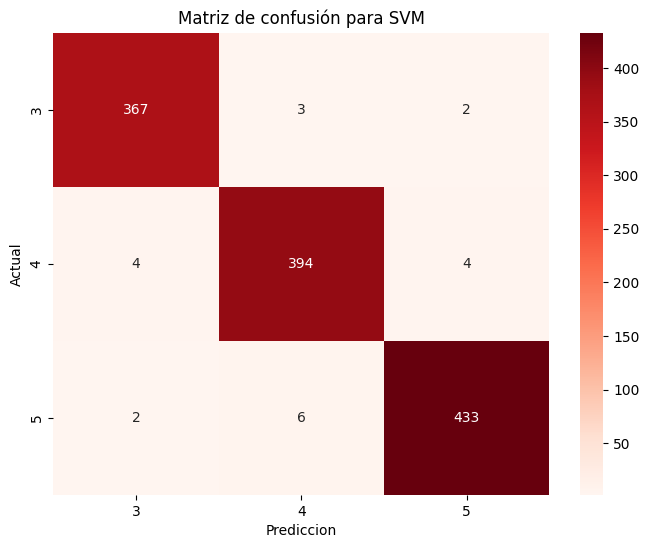

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Matriz de confusión para SVM")
plt.ylabel('Actual')
plt.xlabel('Prediccion')
plt.show()

In [ ]:
# Crear el DataFrame con los valores reales y predicciones
resultados = pd.DataFrame({'Real': y_test, 'Prediccion': y_pred_svm})

# Guardar el DataFrame como un archivo Excel
resultados.to_excel('resultados_svm.xlsx', index=False)

print("Archivo Excel generado: resultados_svm.xlsx")

Archivo Excel generado: resultados_svm.xlsx


### Regresion Logistica

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           3       0.98      0.98      0.98       372
           4       0.98      0.98      0.98       402
           5       0.99      0.98      0.98       441

    accuracy                           0.98      1215
   macro avg       0.98      0.98      0.98      1215
weighted avg       0.98      0.98      0.98      1215



> #### Resultados:


> #### Clase 3:


> el **98%** de las veces que el modelo predice la clase **3**, esa predicción es correcta.

> el **98%** de las instancias que realmente pertenecen a la clase **3** fueron correctamente identificadas por el modelo.

> #### Clase 4:

> el **98%** de las veces que el modelo predice la clase **4**, esa predicción es correcta.

> el **98%** de las instancias que realmente pertenecen a la clase **4** fueron correctamente identificadas por el modelo.

> #### Clase 5:

> el **99%** de las veces que el modelo predice la clase **5**, esa predicción es correcta.

> el **98%** de las instancias que realmente pertenecen a la clase **5** fueron correctamente identificadas por el modelo.

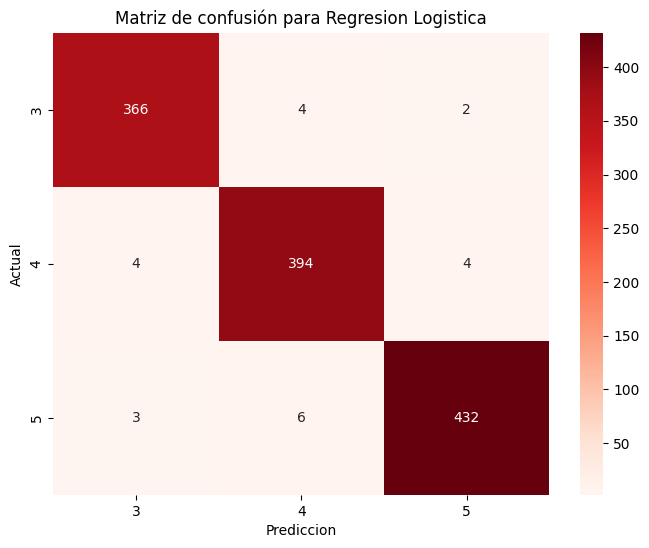

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.title("Matriz de confusión para Regresion Logistica")
plt.ylabel('Actual')
plt.xlabel('Prediccion')
plt.show()

In [ ]:
# Crear un DataFrame con los valores reales y predicciones para la Regresión Logística
resultados_lr = pd.DataFrame({'Real': y_test, 'Prediccion': y_pred_lr})

# Guardar el DataFrame como un archivo Excel
resultados_lr.to_excel('resultados_lr.xlsx', index=False)

print("Archivo Excel generado: resultados_lr.xlsx")

Archivo Excel generado: resultados_lr.xlsx


### Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           3       0.97      0.97      0.97       372
           4       0.97      0.97      0.97       402
           5       0.98      0.97      0.97       441

    accuracy                           0.97      1215
   macro avg       0.97      0.97      0.97      1215
weighted avg       0.97      0.97      0.97      1215



> #### Resultados:

> #### Clase 3:

> el **98%** de las veces que el modelo predice la clase **3**, esa predicción es correcta.

> el **97%** de las instancias que realmente pertenecen a la clase **3** fueron correctamente identificadas por el modelo.

> #### Clase 4:

> el **96%** de las veces que el modelo predice la clase **4**, esa predicción es correcta.

> el **98%** de las instancias que realmente pertenecen a la clase **4** fueron correctamente identificadas por el modelo.

> #### Clase 5:

> el **97%** de las veces que el modelo predice la clase **5**, esa predicción es correcta.

> el **97%** de las instancias que realmente pertenecen a la clase **5** fueron correctamente identificadas por el modelo.

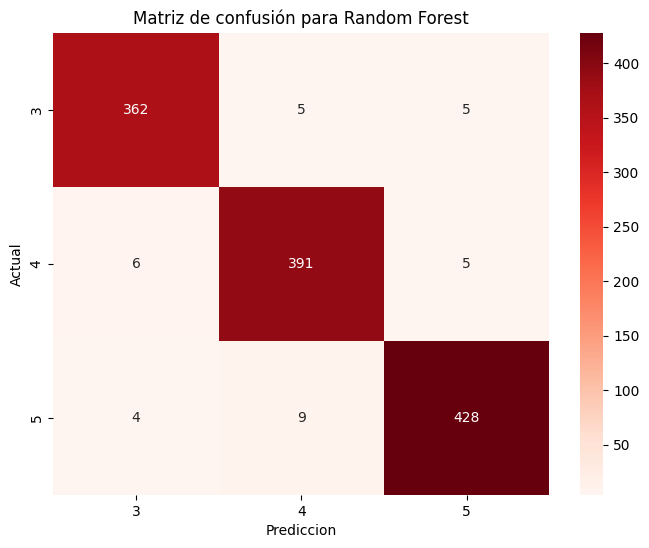

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Matriz de confusión para Random Forest")
plt.ylabel('Actual')
plt.xlabel('Prediccion')
plt.show()

In [ ]:
# Crear un DataFrame con los valores reales y las predicciones de Random Forest
resultados_rf = pd.DataFrame({'Real': y_test, 'Prediccion': y_pred_rf})

# Guardar el DataFrame en un archivo Excel
resultados_rf.to_excel('resultados_rf.xlsx', index=False)

print("Archivo Excel generado: resultados_rf.xlsx")

Archivo Excel generado: resultados_rf.xlsx
